In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
directory = "rinex2csv/data/"

In [3]:
# import data
df_G = pd.read_csv(directory + "GEOP.csv")[['GPST','dec_sec','satId','psr_1','psr_2','phs_1','phs_2']]
df_R = pd.read_csv(directory + "RINEXON.csv")[['GPST','dec_sec','satId','psr_1','psr_2','phs_1','phs_2']]

In [4]:
# Structurate the data
## Creating the time according to the second passed from the starting of the day
h_G = df_G["GPST"].str.extract('2020-02-05 (\d\d):(\d\d):(\d\d)')[0].astype(int)*3600
m_G = df_G["GPST"].str.extract('2020-02-05 (\d\d):(\d\d):(\d\d)')[1].astype(int)*60
s_G = df_G["GPST"].str.extract('2020-02-05 (\d\d):(\d\d):(\d\d)')[2].astype(int)
df_G["time"] = h_G.values + m_G.values + s_G.values 

h_R = df_R["GPST"].str.extract('2020-02-05 (\d\d):(\d\d):(\d\d)')[0].astype(int)*3600
m_R = df_R["GPST"].str.extract('2020-02-05 (\d\d):(\d\d):(\d\d)')[1].astype(int)*60
s_R = df_R["GPST"].str.extract('2020-02-05 (\d\d):(\d\d):(\d\d)')[2].astype(int)
df_R["time"] = h_R.values + m_R.values + s_R.values 

## Transform the string into a decimal value
frac_sec_G = df_G.dec_sec/10**7
frac_sec_R = df_R.dec_sec/10**7

# Copy the database to set a different indexing (better for some plots)
df_G2 = df_G.copy()
df_R2 = df_R.copy()
df_G2["time"] = df_G2.GPST + ' ' + frac_sec_G.apply(str)
df_R2["time"] = df_R2.GPST + ' ' + frac_sec_R.apply(str)
df_G2 = df_G2.set_index(['time'])
df_R2 = df_R2.set_index(['time'])

# Create another copy with a different index (better for some plots)
df_G3 = df_G2.copy()
df_R3 = df_R2.copy()
df_G3 = df_G3.set_index(['GPST'])
df_R3 = df_R3.set_index(['GPST'])

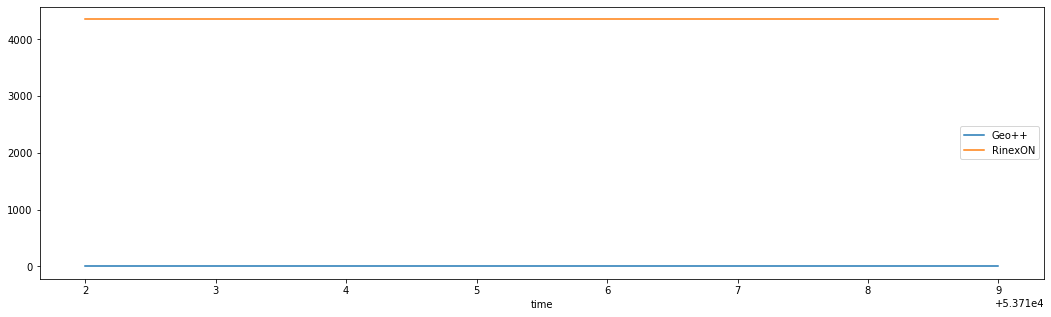

In [5]:
# Fraction of second in which the measurement is taken
time_G = df_G.groupby(["time"]).mean().dec_sec
time_R = df_R.groupby(["time"]).mean().dec_sec
time = pd.merge(time_G, time_R, how = 'outer', left_index = True, right_index = True, suffixes=('_G', '_R'))
time = time.rename(columns={"dec_sec_G":"Geo++","dec_sec_R":"RinexON"})
time.plot(figsize = (18,5))

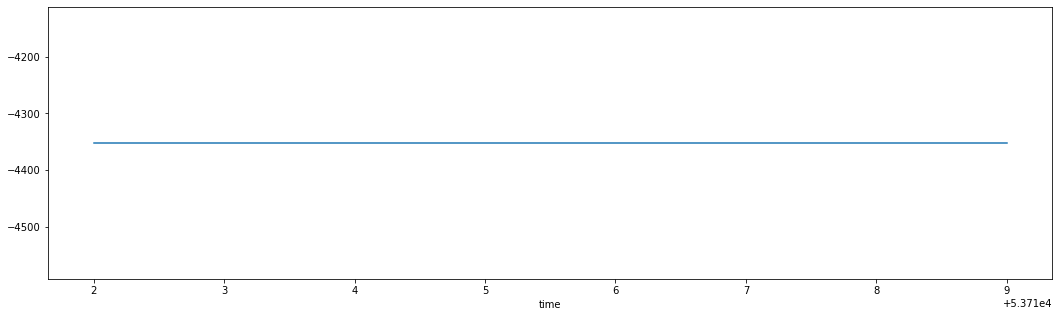

In [6]:
# Difference in the 10^(-7) seoconds of the observation
time_diff = time["Geo++"] - time["RinexON"]
time_diff.plot(figsize = (18,5))

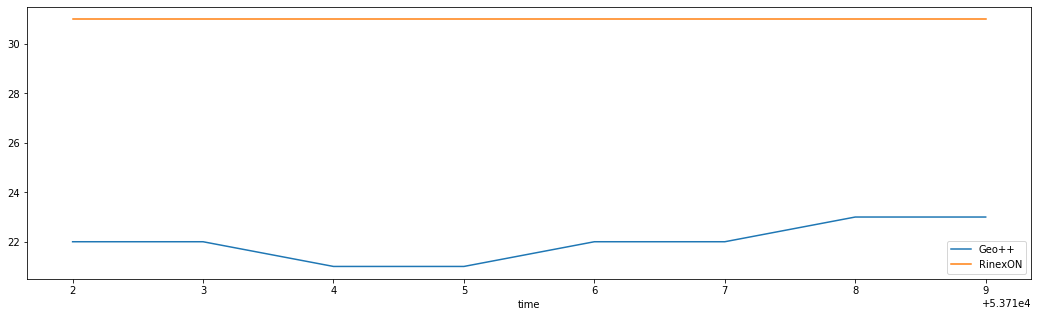

In [7]:
# Number of visible satellite
nsat_G = df_G.groupby(["time"]).count().satId
nsat_R = df_R.groupby(["time"]).count().satId
nsat = pd.merge(nsat_G, nsat_R, how = 'outer', left_index = True, right_index = True, suffixes=('_G', '_R'))
nsat = nsat.rename(columns={"satId_G":"Geo++","satId_R":"RinexON"})
nsat.plot(figsize = (18,5))

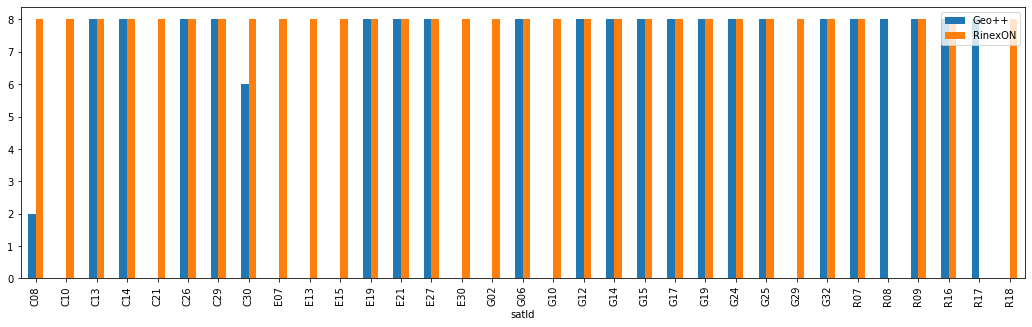

In [8]:
# Plot of visible satellite
n_sat_div_G = df_G.groupby(["satId"]).count().dec_sec
n_sat_div_R = df_R.groupby(["satId"]).count().dec_sec
n_sat = pd.merge(n_sat_div_G, n_sat_div_R, how = 'outer', left_index = True, right_index = True, suffixes=('_G', '_R'))
n_sat = n_sat.rename(columns={"dec_sec_G":"Geo++","dec_sec_R":"RinexON"})
n_sat.plot.bar(figsize = (18,5))

In [9]:
# List of visible satellite
name_sat = n_sat.index.values
name_sat

array(['C08', 'C10', 'C13', 'C14', 'C21', 'C26', 'C29', 'C30', 'E07',
       'E13', 'E15', 'E19', 'E21', 'E27', 'E30', 'G02', 'G06', 'G10',
       'G12', 'G14', 'G15', 'G17', 'G19', 'G24', 'G25', 'G29', 'G32',
       'R07', 'R08', 'R09', 'R16', 'R17', 'R18'], dtype=object)

In [10]:
# Satellite selection
sat_G = df_G3[df_G3['satId']=='G24']
sat_R = df_R3[df_R3['satId']=='G24']

sat_G["psr_1"] = pd.to_numeric(sat_G["psr_1"], errors='coerce')
sat_R["psr_1"] = pd.to_numeric(sat_R["psr_1"], errors='coerce')

sat_G["psr_2"] = pd.to_numeric(sat_G["psr_2"], errors='coerce')
sat_R["psr_2"] = pd.to_numeric(sat_R["psr_2"], errors='coerce')

sat_G["phs_1"] = pd.to_numeric(sat_G["phs_1"], errors='coerce')
sat_R["phs_1"] = pd.to_numeric(sat_R["phs_1"], errors='coerce')

sat_G["phs_2"] = pd.to_numeric(sat_G["phs_2"], errors='coerce')
sat_R["phs_2"] = pd.to_numeric(sat_R["phs_2"], errors='coerce')

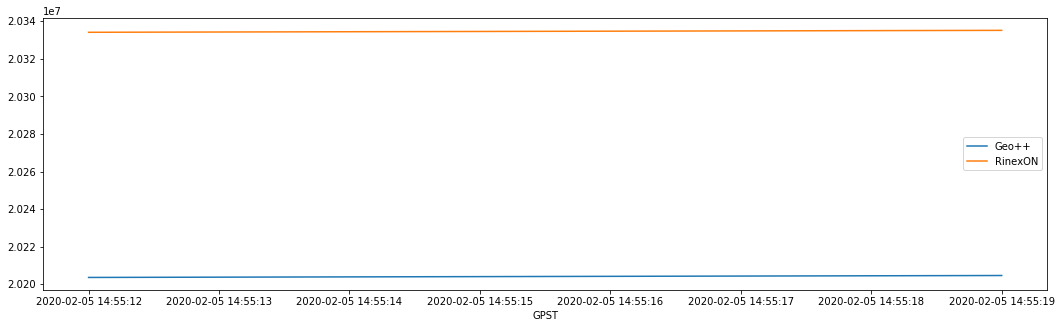

In [11]:
# Pseudorange obs frequency 1
sat_f1_c = pd.merge(sat_G["psr_1"], sat_R["psr_1"], how = 'outer', left_index = True, right_index = True, suffixes=('_G', '_R'))
sat_f1_c = sat_f1_c.rename(columns={"psr_1_G":"Geo++","psr_1_R":"RinexON"})
sat_f1_c.plot(figsize = (18,5))

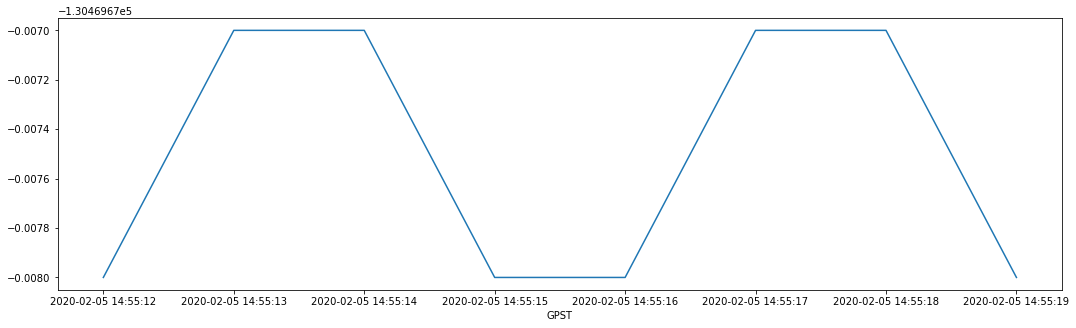

In [12]:
# Difference between the observation of the same pseudorange between the applications
psr_diff_f1 = sat_f1_c["Geo++"] - sat_f1_c["RinexON"]
psr_diff_f1.plot(figsize = (18,5))

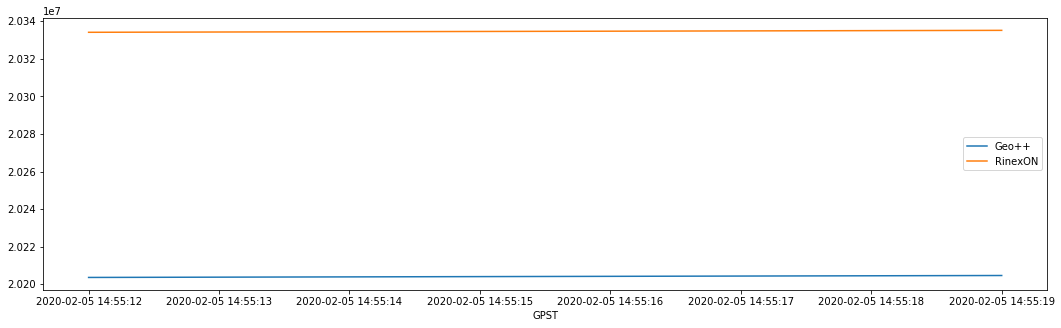

In [13]:
# pseudorange obs frequency 2
sat_f2_c = pd.merge(sat_G["psr_2"], sat_R["psr_2"], how = 'outer', left_index = True, right_index = True, suffixes=('_G', '_R'))
sat_f2_c = sat_f2_c.rename(columns={"psr_2_G":"Geo++","psr_2_R":"RinexON"})
sat_f2_c.plot(figsize = (18,5))

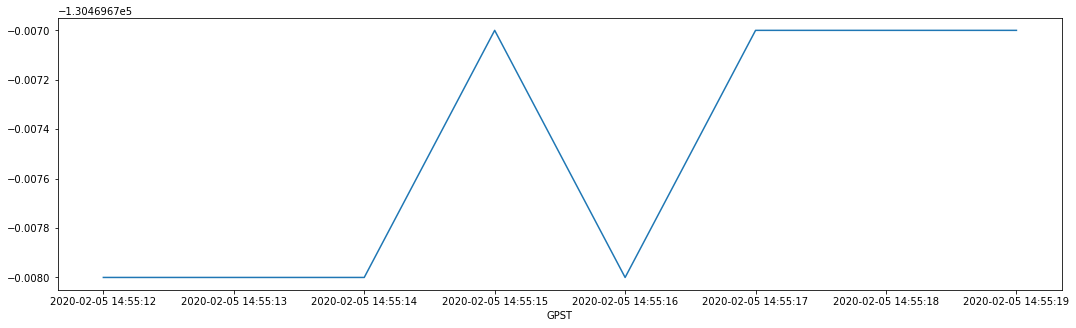

In [14]:
# Difference between the observation of the same pseudorange between the applications
psr_diff_f2 = sat_f2_c["Geo++"] - sat_f2_c["RinexON"]
psr_diff_f2.plot(figsize = (18,5))

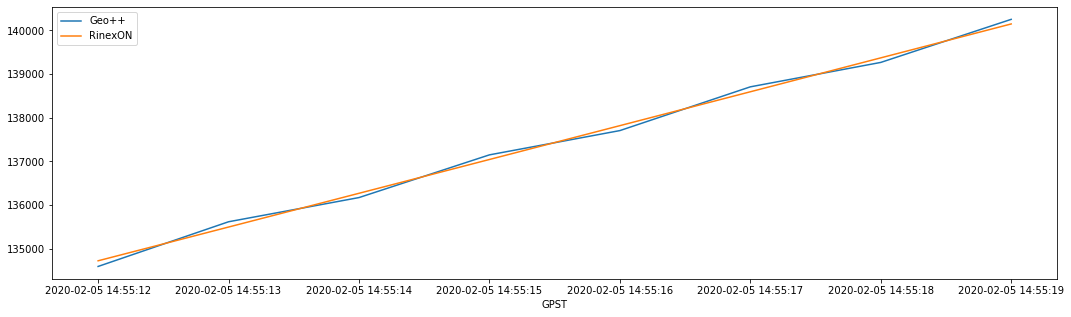

In [15]:
# Phase obs frequency 1
phase_shift1 = sat_G["phs_1"] - sat_R["phs_1"]
diff_sat1 = np.mean(phase_shift1)
sat_f1_f = pd.merge(sat_G["phs_1"] - diff_sat1, sat_R["phs_1"], how = 'outer', left_index = True, right_index = True, suffixes=('_G', '_R'))
sat_f1_f = sat_f1_f.rename(columns={"phs_1_G":"Geo++","phs_1_R":"RinexON"})
sat_f1_f.plot(figsize = (18,5))

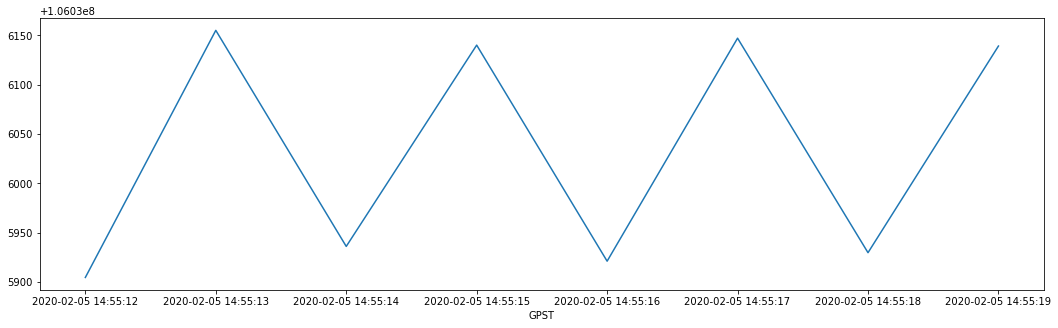

In [16]:
# Difference between the observation of the same phase obs between the applications
phase_shift1.plot(figsize = (18,5))

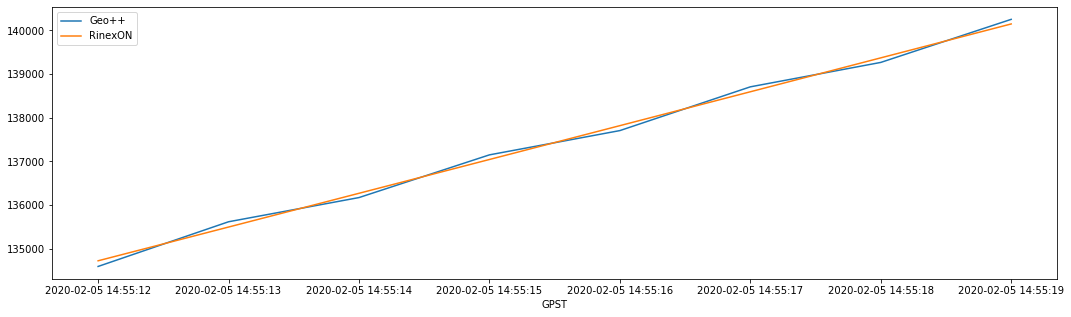

In [17]:
# Phase obs frequency 2
phase_shift2 = sat_G["phs_2"] - sat_R["phs_2"]
diff_sat2 = np.mean(phase_shift2)
sat_f2_f = pd.merge(sat_G["phs_2"] - diff_sat1, sat_R["phs_2"], how = 'outer', left_index = True, right_index = True, suffixes=('_G', '_R'))
sat_f2_f = sat_f1_f.rename(columns={"phs_2_G":"Geo++","phs_2_R":"RinexON"})
sat_f2_f.plot(figsize = (18,5))

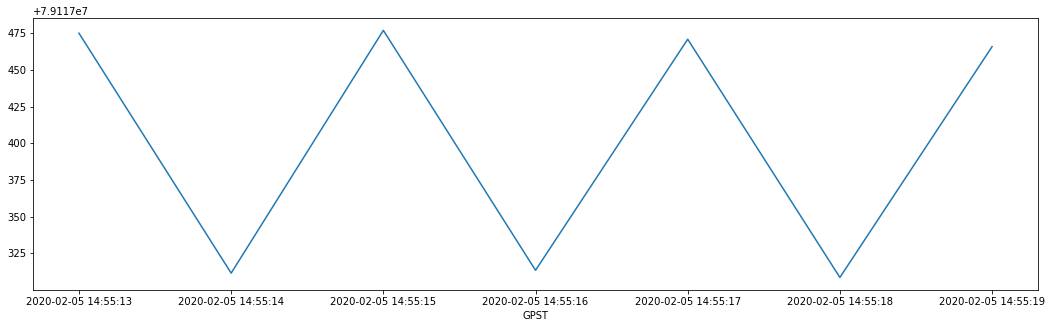

In [18]:
# Difference between the observation of the same phase obs between the applications
phase_shift2.plot(figsize = (18,5))